## Visualizing hourly time seriers using strip plot

In [44]:
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
from sklearn import preprocessing

In [45]:
meta = pd.read_csv('./data/building_metadata.csv')
train = pd.read_csv('./data/train.csv', parse_dates = ['timestamp'])

### 1. Visualize 1-year meter readings as heatmap

In [46]:
meter = 0
building = 0
df1 = train[ (train.building_id == building) & (train.meter == meter) ]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 20213734
Data columns (total 4 columns):
building_id      8784 non-null int64
meter            8784 non-null int64
timestamp        8784 non-null datetime64[ns]
meter_reading    8784 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 343.1 KB


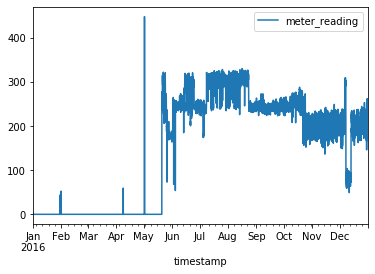

In [47]:
df1.plot(x = 'timestamp', y = 'meter_reading')
df1.to_csv('./data/b1.csv')
#df1[['timestamp', 'meter_reading']].plot()

In [48]:
## Split the datetime into separate columns (N x 24)
def to_hourly(df):
    df_hourly = pd.DataFrame()
    for hr in range(24):
        df_hourly[str(hr)] = df[df.timestamp.dt.hour == hr].meter_reading.to_list()
    df_hourly['date'] = pd.to_datetime(df.timestamp.dt.date.unique())
    df_hourly.set_index('date', inplace=True)
    #df_hourly = df_hourly.round(2)
    return df_hourly   

In [49]:
df2 = to_hourly(df1)
df2.to_csv('./data/b2.csv')
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
def strip_plot(df_list, normanize = False, **kwargs):
    """Strip plot for hourly timeseries of 1-year long.

    Args:
        df_list: list of timeseries. Each item should be a pandas dataframe with 24 columns, for hours 0-23, with DateTimeIndex
        normanize: wheather to normalize the data or not

    Returns:
        None

    """    
        
    n = len(df_list)
    figsize = (12, n*1.25+.15)
    fig, ax = plt.subplots(n, 1, figsize=figsize)

    for ix in range(n):
        df = df_list[ix]

        dates = df.index.to_pydatetime()
        dnum = mdates.date2num(dates)
        start = dnum[0] - (dnum[1]-dnum[0])/2.
        stop = dnum[-1] + (dnum[1]-dnum[0])/2.
        extent = [start, stop, -0.5, len(df.columns)-0.5]
        
        if normanize:            
            df = preprocessing.MinMaxScaler().fit_transform(df)

        #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
        im = ax[ix].imshow(df.T, extent=extent, aspect="auto", **kwargs)

        ax[ix].set_ylabel(f'Meter-{ix}')
        ax[ix].set_yticks([0,6,12,18,23])
        ax[ix].hlines([6,12,18], *ax[ix].get_xlim(), linestyles='dashed', lw=1, color='grey')

        if ix == n-1: ## last strip
            ax[ix].xaxis.set_major_locator(mdates.MonthLocator())
            ax[ix].xaxis.set_minor_locator(mdates.DayLocator())
            ax[ix].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        else:
            ax[ix].set_xticklabels(labels = '')
    plt.tight_layout()
    fig.colorbar(im, ax=ax.ravel().tolist())
    plt.show()    

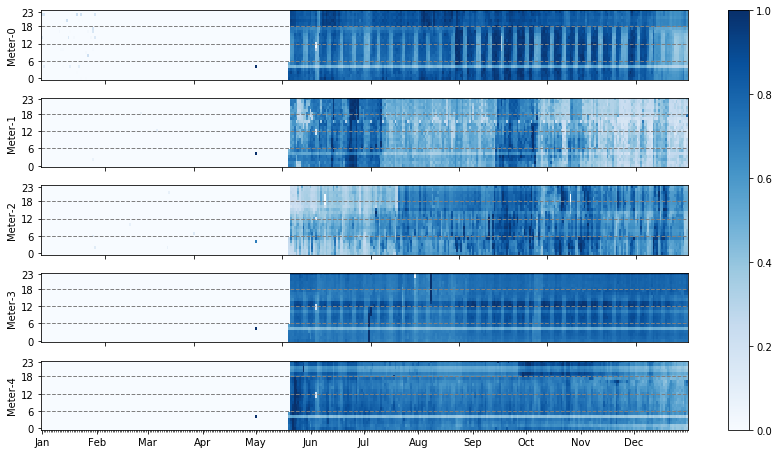

In [55]:
df_list = []
meter = 0
building = 0
for bid in range(20,25):
    df1 = train[ (train.building_id == bid) & (train.meter == meter) ]
    df_list.append(to_hourly(df1))
strip_plot(df_list, normanize=True, cmap='Blues')

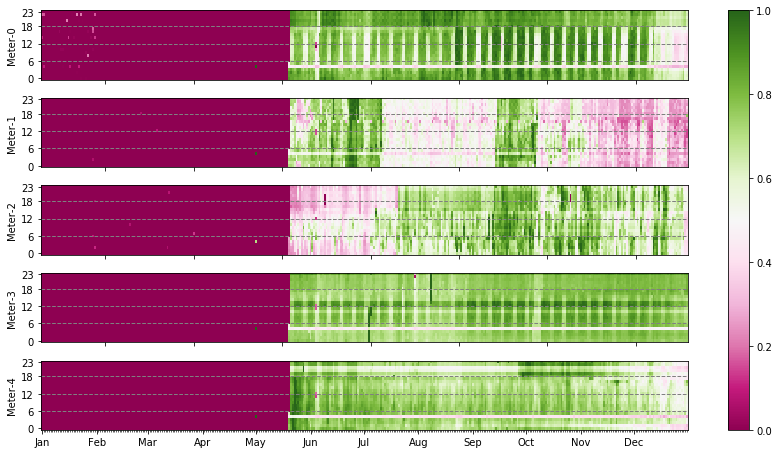

In [57]:
strip_plot(df_list, normanize=True, cmap='PiYG')

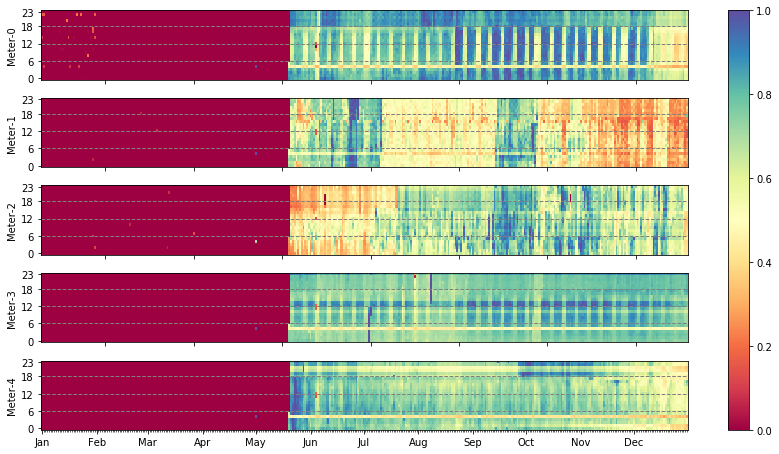

In [59]:
strip_plot(df_list, normanize=True, cmap='Spectral')

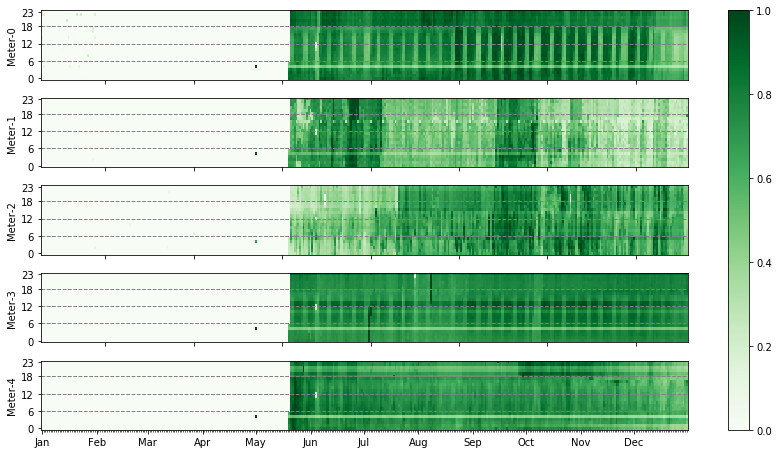

In [62]:
strip_plot(df_list, normanize=True, cmap='Greens')

### test code

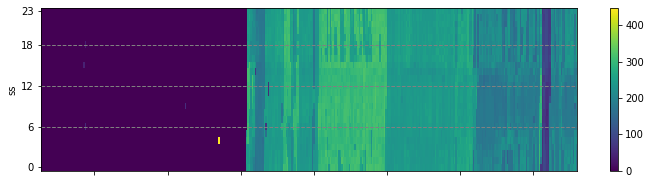

In [230]:

dates = df2.index.to_pydatetime()
dnum = mdates.date2num(dates)
start = dnum[0] - (dnum[1]-dnum[0])/2.
stop = dnum[-1] + (dnum[1]-dnum[0])/2.
extent = [start, stop, -0.5, len(df2.columns)-0.5]

fig, ax = plt.subplots(figsize=(12,3))
im = ax.imshow(df2.T, extent=extent, aspect="auto")

ax.hlines([6,12,18], *ax.get_xlim(), linestyles='dashed', lw=1, color='grey')

ax.set_yticks([0,6,12,18,23])
ax.set_xticklabels(labels = '')


# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

fig.colorbar(im)
plt.show()

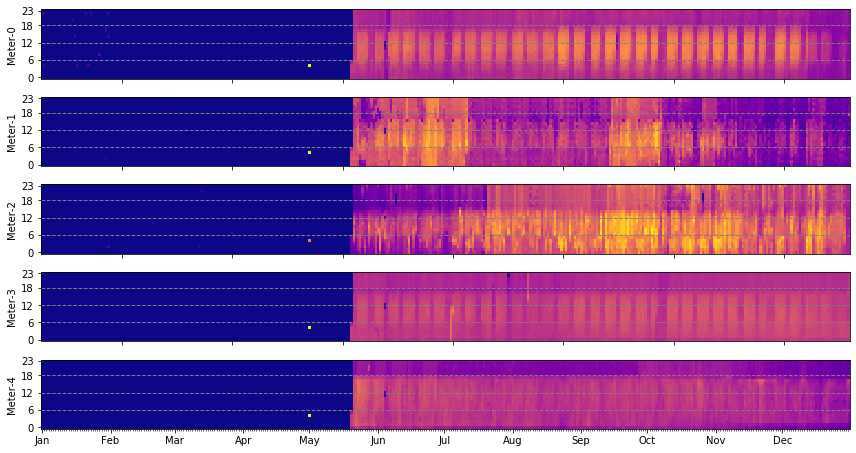

In [245]:
n = len(df_list)
figsize = (12, n*1.25+.15)
fig, axis = plt.subplots(n, 1, figsize=figsize)

for ix in range(n):
    df = df_list[ix]
    
    dates = df.index.to_pydatetime()
    dnum = mdates.date2num(dates)
    start = dnum[0] - (dnum[1]-dnum[0])/2.
    stop = dnum[-1] + (dnum[1]-dnum[0])/2.
    extent = [start, stop, -0.5, len(df.columns)-0.5]

    im = axis[ix].imshow(df.T, extent=extent, aspect="auto", cmap = 'plasma')
    
    axis[ix].set_ylabel(f'Meter-{ix}')
    axis[ix].set_yticks([0,6,12,18,23])
    axis[ix].hlines([6,12,18], *axis[ix].get_xlim(), linestyles='dashed', lw=1, color='grey')
    
    if ix == n-1: ## last strip
        axis[ix].xaxis.set_major_locator(mdates.MonthLocator())
        axis[ix].xaxis.set_minor_locator(mdates.DayLocator())
        axis[ix].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    else:
        axis[ix].set_xticklabels(labels = '')
plt.tight_layout()

In [261]:
## plots the 
def strip_plot(df_list, normanize = False, **kwargs):
    
    from sklearn import preprocessing
    
    n = len(df_list)
    figsize = (12, n*1.25+.15)
    fig, ax = plt.subplots(n, 1, figsize=figsize)

    for ix in range(n):
        df = df_list[ix]

        dates = df.index.to_pydatetime()
        dnum = mdates.date2num(dates)
        start = dnum[0] - (dnum[1]-dnum[0])/2.
        stop = dnum[-1] + (dnum[1]-dnum[0])/2.
        extent = [start, stop, -0.5, len(df.columns)-0.5]
        
        if normanize:
            df = preprocessing.MinMaxScaler().fit_transform(df)

        #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
        im = ax[ix].imshow(df.T, extent=extent, aspect="auto", **kwargs)

        ax[ix].set_ylabel(f'Meter-{ix}')
        ax[ix].set_yticks([0,6,12,18,23])
        ax[ix].hlines([6,12,18], *ax[ix].get_xlim(), linestyles='dashed', lw=1, color='grey')

        if ix == n-1: ## last strip
            ax[ix].xaxis.set_major_locator(mdates.MonthLocator())
            ax[ix].xaxis.set_minor_locator(mdates.DayLocator())
            ax[ix].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        else:
            ax[ix].set_xticklabels(labels = '')
    plt.tight_layout()
    fig.colorbar(im, ax=ax.ravel().tolist())
    plt.show()

In [262]:
# ## plots the 
# def strip_plot_(df_list, df_names):
#     n = len(df_list)
#     figsize = (20, n*2+.5)
#     f, axis = plt.subplots(n, 1, figsize=figsize)
    
#     for ix in range(n):
#         df = df_list[ix]
#         if ix == n-1: ## last strip
#             sns.heatmap(df.T, cbar=False, ax=axis[ix], cmap="YlGnBu")
#         else:
#             sns.heatmap(df.T, cbar=False, ax=axis[ix], cmap="YlGnBu", xticklabels=False)            
#         axis[ix].set_xlabel('')
        
#         df_names

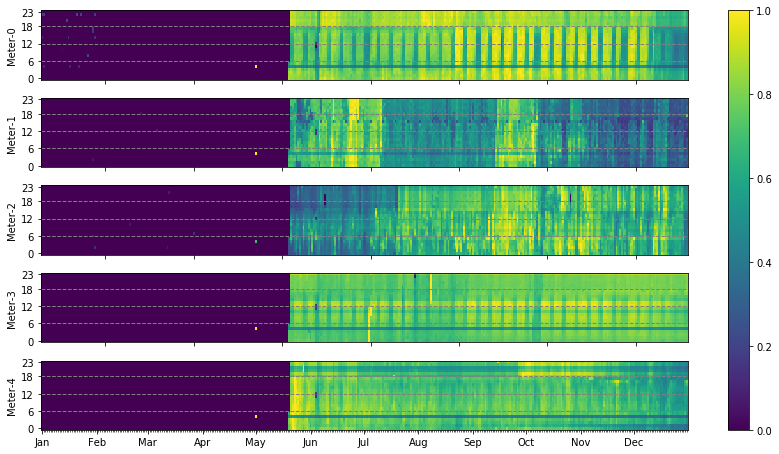

TypeError: strip_plot() missing 1 required positional argument: 'df_names'

In [151]:
#df_hourly = pd.DataFrame({'date': df1.timestamp.dt.date})
df_hourly = pd.DataFrame()
for hr in range(5):
    #print(hr)
    df2 = df1.copy()[df1.timestamp.dt.hour == hr]
    df_hourly[str(hr)] = df2.meter_reading.to_list()
    print('\n', hr, df2.shape)
    #print(df2.meter_reading.describe())
df_hourly['date'] = pd.to_datetime(df1.timestamp.dt.date.unique())
df_hourly.set_index('date', inplace=True)
df_hourly = df_hourly.round(2)
df_hourly.to_csv('./data/b2.csv')


 0 (366, 4)

 1 (366, 4)

 2 (366, 4)

 3 (366, 4)

 4 (366, 4)


In [152]:
df_hourly.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)

In [71]:
print(df2.meter_reading.describe())

count    366.000000
mean     144.301805
std      121.733345
min        0.000000
25%        0.000000
50%      181.561500
75%      244.357000
max      320.803000
Name: meter_reading, dtype: float64
